<a href="https://colab.research.google.com/github/CamiloLoaiza12/Analitica2_trabajo1/blob/main/Entrega_1_analitica_de_datos_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importar datos
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
## Remove Warnings
import warnings
warnings.filterwarnings("ignore")

## Data
import pandas as pd
import numpy as np
from itertools import product

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

## Modelling
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error, r2_score, classification_report
import math

In [155]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline

In [213]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

%matplotlib inline

DESCRIPCION DE LAS VARIABLES

# IMPORTACION DE DATOS

In [73]:
infogeneral = pd.read_csv('general_data.csv', sep = ",")
infogeneral

Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   
4409   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  EmployeeID  \
0                    6          2  Life Sciences              1           1   
1                   10          1  Life Sciences              1           2   
2                   17          4          Other              1           3   
3                    2          5  Life Sciences              1           4   
4                   10          1        Medical              1           5   
...                ...        ...            ...            ...         ...   
4405                 5          4        Medical              1        4406   
4406                 2          4        Medical              1        4407   
4407                25          2  Life Sciences              1        4408   
4408                18          2        Medical              1        4409   
4409                28          3        Medical              1        4410   

      Gender  ...  NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0     Female  ...                 1.0      Y                11              8   
1     Female  ...                 0.0      Y                23              8   
2       Male  ...                 1.0      Y                15              8   
3       Male  ...                 3.0      Y                11              8   
4       Male  ...                 4.0      Y                12              8   
...      ...  ...                 ...    ...               ...            ...   
4405  Female  ...                 3.0      Y                17              8   
4406    Male  ...                 2.0      Y                15              8   
4407    Male  ...                 0.0      Y                20              8   
4408    Male  ...                 0.0      Y                14              8   
4409    Male  ...                 0.0      Y                12              8   

      StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
0                    0               1.0                      6   
1                    1               6.0                      3   
2                    3               5.0                      2   
3                    3              13.0                      5   
4                    2               9.0                      2   
...                ...               ...                    ...   
4405                 1              10.0                      5   
4406                 0              10.0                      2   
4407                 0               5.0                      4   
4408                 1              10.0                      2   
4409                 0               NaN                      6   

      YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  
0                  1                        0                     0  
1                  5                        1                     4  
2                  5                        0                     3  
3                  8                        7                     5  
4                  6                        0                     4  
...              ...                      ...                   ..

In [74]:
infogeneral["EmployeeID"].unique()

array([   1,    2,    3, ..., 4408, 4409, 4410], dtype=int64)

In [75]:
encuesta_satisfaccion = pd.read_csv("employee_survey_data.csv", sep = ",")
encuesta_satisfaccion.head(5)

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0           1                      3.0              4.0              2.0
1           2                      3.0              2.0              4.0
2           3                      2.0              2.0              1.0
3           4                      4.0              4.0              3.0
4           5                      4.0              1.0              3.0

In [76]:
evaluacion_desempeño= pd.read_csv("manager_survey_data.csv", sep = ",")
evaluacion_desempeño.head(10)

EmployeeID  JobInvolvement  PerformanceRating
0           1               3                  3
1           2               2                  4
2           3               3                  3
3           4               2                  3
4           5               3                  3
5           6               3                  3
6           7               3                  4
7           8               3                  4
8           9               3                  4
9          10               3                  3

In [77]:
tiempo_dedicacion= pd.read_excel("time_work.xlsx", header = 0)
tiempo_dedicacion.set_index("EmployeeID", inplace = True)
tiempo_dedicacion.head(5)

mean_time
EmployeeID           
1              6.8702
2              7.3160
3              6.8161
4              6.7892
5              7.8776

# UNION DE TABLAS

In [78]:
tabla=pd.merge(infogeneral, encuesta_satisfaccion, how="inner", on="EmployeeID").merge(evaluacion_desempeño,  how="inner", on="EmployeeID" ).merge(tiempo_dedicacion, how="inner", on="EmployeeID")
tabla.head(5)

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   TrainingTimesLastYear YearsAtCompany YearsSinceLastPromotion  \
0                      6              1                       0   
1                      3              5                       1   
2                      2              5                       0   
3                      5              8                       7   
4                      2              6                       0   

   YearsWithCurrManager  EnvironmentSatisfaction JobSatisfaction  \
0                     0                      3.0             4.0   
1                     4                      3.0             2.0   
2                     3                      2.0             2.0   
3                     5                      4.0             4.0   
4                     4                      4.0             1.0   

   WorkLifeBalance  JobInvolvement  PerformanceRating  mean_time  
0              2.0               3                  3     6.8702  
1              4.0               2                  4     7.3160  
2              1.0               3                  3     6.8161  
3              3.0               2                  3     6.7892  
4              3.0               3                  3     7.8776  

[5 rows x 30 columns]

# RENOMBRAMIENTO DE COLUMNAS

In [16]:
tabla.rename(columns={"Age":"edad","Attrition":"desercion_año_anterior","BusinessTravel":"frecuencia_viajes","Department":"departamento","DistanceFromHome":"distancia_domicilio","Education":"educacion","EducationField":"formacion","EmployeeCount":"conteo_de_empleados","EmployeeID":"ID","Gender":"genero","JobLevel":"nivel_de_cargo","JobRole":"nombre_cargo","MaritalStatus":"estado_civil","MonthlyIncome":"ingresos_mensuales","NumCompaniesWorked":"empresas_anteriores","Over18":"edad>18","PercentSalaryHike":"porcentaje_aumentosalario","StandardHours":"horas_trabajo","StockOptionLevel":"nivel_de_opciones","TotalWorkingYears":"años_de_trabajo","TrainingTimesLastYear":"numero_capacitaciones","YearsAtCompany":"años_empresa","YearsSinceLastPromotion":"años_desde_acenso","YearsWithCurrManager":"años_jefe_actual","EnvironmentSatisfaction":"satisfaccion_entorno","JobSatisfaction":"satisfaccion_laboral","WorkLifeBalance":"conciliacion_faimilar_laboral","JobInvolvement":"implicacion_laboral","PerformanceRating":"rendimiento","mean_time":"tiempo_prom_dia"},inplace=True)

In [17]:
tabla

edad desercion_año_anterior  frecuencia_viajes            departamento  \
0       51                     No      Travel_Rarely                   Sales   
1       31                    Yes  Travel_Frequently  Research & Development   
2       32                     No  Travel_Frequently  Research & Development   
3       38                     No         Non-Travel  Research & Development   
4       32                     No      Travel_Rarely  Research & Development   
...    ...                    ...                ...                     ...   
4405    42                     No      Travel_Rarely  Research & Development   
4406    29                     No      Travel_Rarely  Research & Development   
4407    25                     No      Travel_Rarely  Research & Development   
4408    42                     No      Travel_Rarely                   Sales   
4409    40                     No      Travel_Rarely  Research & Development   

      distancia_domicilio  educacion      formacion  conteo_de_empleados  \
0                       6          2  Life Sciences                    1   
1                      10          1  Life Sciences                    1   
2                      17          4          Other                    1   
3                       2          5  Life Sciences                    1   
4                      10          1        Medical                    1   
...                   ...        ...            ...                  ...   
4405                    5          4        Medical                    1   
4406                    2          4        Medical                    1   
4407                   25          2  Life Sciences                    1   
4408                   18          2        Medical                    1   
4409                   28          3        Medical                    1   

        ID  genero  ...  numero_capacitaciones años_empresa años_desde_acenso  \
0        1  Female  ...                      6            1                 0   
1        2  Female  ...                      3            5                 1   
2        3    Male  ...                      2            5                 0   
3        4    Male  ...                      5            8                 7   
4        5    Male  ...                      2            6                 0   
...    ...     ...  ...                    ...          ...               ...   
4405  4406  Female  ...                      5            3                 0   
4406  4407    Male  ...                      2            3                 0   
4407  4408    Male  ...                      4            4                 1   
4408  4409    Male  ...                      2            9                 7   
4409  4410    Male  ...                      6           21                 3   

      años_jefe_actual  satisfaccion_entorno satisfaccion_laboral  \
0                    0                   3.0                  4.0   
1                    4                   3.0                  2.0   
2                    3                   2.0                  2.0   
3                    5                   4.0                  4.0   
4                    4                   4.0                  1.0   
...                ...                   ...                  ...   
4405                 2                   4.0                  1.0   
4406                 2                   4.0                  4.0   
4407                 2                   1.0                  3.0   
4408                 8                   4.0                  1.0   
4409                 9                   1.0                  3.0   

      conciliacion_faimilar_laboral  implicacion_laboral  rendimiento  \
0                               2.0                    3            3   
1                               4.0                    2            4   
2                               1.0                    3            3   
3                               3.0   

# ANALISIS EXPLORATORIO

In [18]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   edad                           4410 non-null   int64  
 1   desercion_año_anterior         4410 non-null   object 
 2   frecuencia_viajes              4410 non-null   object 
 3   departamento                   4410 non-null   object 
 4   distancia_domicilio            4410 non-null   int64  
 5   educacion                      4410 non-null   int64  
 6   formacion                      4410 non-null   object 
 7   conteo_de_empleados            4410 non-null   int64  
 8   ID                             4410 non-null   int64  
 9   genero                         4410 non-null   object 
 10  nivel_de_cargo                 4410 non-null   int64  
 11  nombre_cargo                   4410 non-null   object 
 12  estado_civil                   4410 non-null   o

In [19]:
#Despues del analisis exploratorio hay 3 variables que se eliminaran, ya que no aportan nada al modelo, son constantes.
tabla=tabla.drop(["conteo_de_empleados","edad>18","horas_trabajo","ID" ], axis=1)


# TRATAMIENTO DE NULOS

In [20]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   edad                           4410 non-null   int64  
 1   desercion_año_anterior         4410 non-null   object 
 2   frecuencia_viajes              4410 non-null   object 
 3   departamento                   4410 non-null   object 
 4   distancia_domicilio            4410 non-null   int64  
 5   educacion                      4410 non-null   int64  
 6   formacion                      4410 non-null   object 
 7   genero                         4410 non-null   object 
 8   nivel_de_cargo                 4410 non-null   int64  
 9   nombre_cargo                   4410 non-null   object 
 10  estado_civil                   4410 non-null   object 
 11  ingresos_mensuales             4410 non-null   int64  
 12  empresas_anteriores            4391 non-null   f

In [ ]:
tabla.isnull().sum()

edad                              0
desercion_año_anterior            0
frecuencia_viajes                 0
departamento                      0
distancia_domicilio               0
educacion                         0
formacion                         0
conteo_de_empleados               0
ID                                0
genero                            0
nivel_de_cargo                    0
nombre_cargo                      0
estado_civil                      0
ingresos_mensuales                0
empresas_anteriores              19
edad>18                           0
porcentaje_aumentosalario         0
horas_trabajo                     0
nivel_de_opciones                 0
años_de_trabajo                   9
numero_capacitaciones             0
años_empresa                      0
años_desde_acenso                 0
años_jefe_actual                  0
satisfaccion_entorno             25
satisfaccion_laboral             20
conciliacion_faimilar_laboral    38
implicacion_laboral         

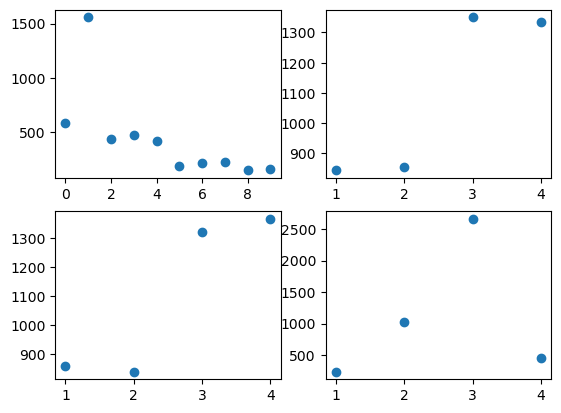

In [10]:
fig, axes = plt.subplots(2,2)   #poner nombre de graficos y variables
axes[0,0].plot(tabla["empresas_anteriores"].value_counts(),"o")
axes[0,1].plot(tabla["satisfaccion_entorno"].value_counts(),"o")
axes[1,0].plot(tabla["satisfaccion_laboral"].value_counts(),"o")
axes[1,1].plot(tabla["conciliacion_faimilar_laboral"].value_counts(),"o")

(array([2., 0., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([ 239. ,  481.1,  723.2,  965.3, 1207.4, 1449.5, 1691.6, 1933.7,
        2175.8, 2417.9, 2660. ]),
 <BarContainer object of 10 artists>)

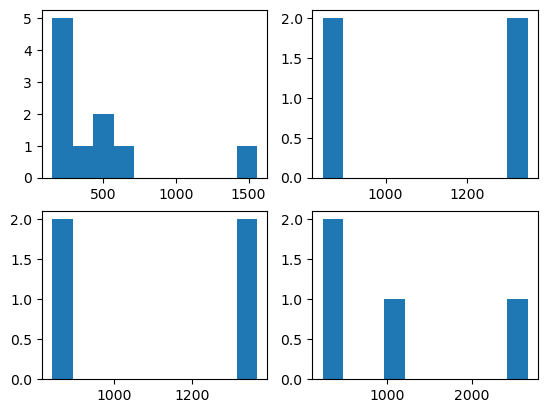

In [11]:
fig, axes = plt.subplots(2,2)   #poner nombre de graficos y variables
axes[0,0].hist(tabla["empresas_anteriores"].value_counts())
axes[0,1].hist(tabla["satisfaccion_entorno"].value_counts())
axes[1,0].hist(tabla["satisfaccion_laboral"].value_counts())
axes[1,1].hist(tabla["conciliacion_faimilar_laboral"].value_counts())

In [12]:
# crear dataset
base = tabla.groupby(['empresas_anteriores'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.bar(base, x='empresas_anteriores', y='count', barmode ='group', title ='<b>Empresas anteriores<b>')

# agregar detalles a la gráfica
fig.update_layout(
    yaxis_title = 'Cantidad',
    xaxis_title = 'Empresas anteriores',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [13]:
# crear dataset
base = tabla.groupby(['satisfaccion_entorno'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.bar(base, x='satisfaccion_entorno', y='count', barmode ='group', title ='<b>Satisfaccion entorno<b>')

# agregar detalles a la gráfica
fig.update_layout(
    yaxis_title = 'Cantidad',
    xaxis_title = 'Satisfaccion entorno',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [14]:
# crear dataset
base = tabla.groupby(['satisfaccion_laboral'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.bar(base, x='satisfaccion_laboral', y='count', barmode ='group', title ='<b>Satisfaccion laboral<b>')

# agregar detalles a la gráfica
fig.update_layout(
    yaxis_title = 'Cantidad',
    xaxis_title = 'Satisfaccion laboral',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [15]:
# crear dataset
base = tabla.groupby(['conciliacion_faimilar_laboral'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.bar(base, x='conciliacion_faimilar_laboral', y='count', barmode ='group', title ='<b>Conciliación familial-laboral<b>')

# agregar detalles a la gráfica
fig.update_layout(
    yaxis_title = 'Cantidad',
    xaxis_title = 'Conciliación familial-laboral',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [17]:
# crear dataset
base = tabla.groupby(['años_de_trabajo'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.histogram(base, x='años_de_trabajo', y='count', barmode ='group', title ='<b>Años de trabajo<b>')

# agregar detalles a la gráfica
fig.update_layout(
    yaxis_title = 'Cantidad',
    xaxis_title = 'Años de trabajo',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [82]:
tabla["empresas_anteriores"]=tabla["empresas_anteriores"].apply(lambda x: x if not pd.isnull(x) else int(tabla["empresas_anteriores"].median()))
tabla["satisfaccion_entorno"]=tabla["satisfaccion_entorno"].apply(lambda x: x if not pd.isnull(x) else int(tabla["satisfaccion_entorno"].median()))
tabla["satisfaccion_laboral"]=tabla["satisfaccion_laboral"].apply(lambda x: x if not pd.isnull(x) else int(tabla["satisfaccion_laboral"].median()))
tabla["conciliacion_faimilar_laboral"]=tabla["conciliacion_faimilar_laboral"].apply(lambda x: x if not pd.isnull(x) else int(tabla["conciliacion_faimilar_laboral"].median()))
tabla["años_de_trabajo"]=tabla["años_de_trabajo"].apply(lambda x: x if not pd.isnull(x) else int(tabla["años_de_trabajo"].mean()))

In [20]:
tabla.isnull().sum()

edad                             0
desercion_año_anterior           0
frecuencia_viajes                0
departamento                     0
distancia_domicilio              0
educacion                        0
formacion                        0
conteo_de_empleados              0
ID                               0
genero                           0
nivel_de_cargo                   0
nombre_cargo                     0
estado_civil                     0
ingresos_mensuales               0
empresas_anteriores              0
edad>18                          0
porcentaje_aumentosalario        0
horas_trabajo                    0
nivel_de_opciones                0
años_de_trabajo                  0
numero_capacitaciones            0
años_empresa                     0
años_desde_acenso                0
años_jefe_actual                 0
satisfaccion_entorno             0
satisfaccion_laboral             0
conciliacion_faimilar_laboral    0
implicacion_laboral              0
rendimiento         

# DUPLICADOS

In [21]:
tabla[tabla.duplicated()]

Empty DataFrame
Columns: [edad, desercion_año_anterior, frecuencia_viajes, departamento, distancia_domicilio, educacion, formacion, genero, nivel_de_cargo, nombre_cargo, estado_civil, ingresos_mensuales, empresas_anteriores, porcentaje_aumentosalario, nivel_de_opciones, años_de_trabajo, numero_capacitaciones, años_empresa, años_desde_acenso, años_jefe_actual, satisfaccion_entorno, satisfaccion_laboral, conciliacion_faimilar_laboral, implicacion_laboral, rendimiento, tiempo_prom_dia]
Index: []

[0 rows x 26 columns]

# ANALISIS UNIVARIADO

### VARIABLES NUMERICAS

In [27]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)

        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

num_cols = [col for col in tabla.columns if tabla[col].dtypes != "O"]
num_cols.pop(0)

for col in num_cols:
    num_summary(tabla, col, plot=False)

count    4410.000000
mean        9.192517
std         8.105026
min         1.000000
5%          1.000000
10%         1.000000
20%         2.000000
30%         3.000000
40%         5.000000
50%         7.000000
60%         9.000000
70%        11.000000
80%        17.000000
90%        23.000000
95%        26.000000
99%        29.000000
max        29.000000
Name: distancia_domicilio, dtype: float64
count    4410.000000
mean        2.912925
std         1.023933
min         1.000000
5%          1.000000
10%         1.000000
20%         2.000000
30%         2.000000
40%         3.000000
50%         3.000000
60%         3.000000
70%         4.000000
80%         4.000000
90%         4.000000
95%         4.000000
99%         5.000000
max         5.000000
Name: educacion, dtype: float64
count    4410.000000
mean        2.063946
std         1.106689
min         1.000000
5%          1.000000
10%         1.000000
20%         1.000000
30%         1.000000
40%         2.000000
50%         2.000000
60

##### INGRESOS MENSUALES

In [22]:
base = tabla.groupby(['ingresos_mensuales'])[['distancia_domicilio']].count().reset_index().sort_values('distancia_domicilio', ascending = False).rename(columns ={'distancia_domicilio':'count'})

# crear gráfica
fig = px.histogram(base, x='ingresos_mensuales', y='count', title ='<b>Ingresos_mensuales<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Ingresos mensuales',
    yaxis_title = 'Cantidad de personas',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [102]:
base=tabla['ingresos_mensuales']
# crear gráfica
fig = px.box(base, x='ingresos_mensuales', title ='<b>Ingresos mensuales<b>')

# agregar detalles a la gráfica
fig.update_layout(
    yaxis_title = 'Ingresos mensuales',
    xaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### EDAD

In [103]:
base = tabla.groupby(['edad'])[['distancia_domicilio']].count().reset_index().sort_values('distancia_domicilio', ascending = False).rename(columns ={'distancia_domicilio':'count'})

# crear gráfica
fig = px.histogram(base, x='edad', y='count', title ='<b>Edad<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Edad',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [104]:
#base = tabla.groupby(['distancia_domicilio'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})
base=tabla['edad']
# crear gráfica
fig = px.box(base, x='edad', title ='<b>Edad<b>')

# agregar detalles a la gráfica
fig.update_layout(
    yaxis_title = 'Edad',
    xaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### DISTANCIA


In [106]:
base = tabla.groupby(['distancia_domicilio'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.histogram(base, x='distancia_domicilio', y='count', title ='<b>Distancia del domicilio<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Distancia del domicilio',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [107]:
#base = tabla.groupby(['distancia_domicilio'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})
base=tabla['distancia_domicilio']
# crear gráfica
fig = px.box(base, x='distancia_domicilio', title ='<b>Distancia del domicilio<b>')

# agregar detalles a la gráfica
fig.update_layout(
    yaxis_title = 'Distancia del domicilio',
    xaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### NUMERO DE EMPRESAS ANTERIORES

In [109]:
base = tabla.groupby(['empresas_anteriores'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.bar(base, x='empresas_anteriores', y='count', title ='<b>Empresas anteriores de los empleados<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Empresas anteriores',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [110]:
#base = tabla.groupby(['distancia_domicilio'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})
base=tabla["empresas_anteriores"]
# crear gráfica
fig = px.box(base, x='empresas_anteriores', title ='<b>Empresas anteriores de los empleados<b>')

# agregar detalles a la gráfica
fig.update_layout(
    yaxis_title = 'Empresa anteriores',
    xaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### PORCENTAJE AUMENTO DEL SALARIO

In [114]:
base = tabla.groupby(['porcentaje_aumentosalario'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.histogram(base, x='porcentaje_aumentosalario', y='count', title ='<b>Porcentaje aumento del salario de los empleados ultimo año<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Porcentaje de aumento de salario',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [115]:
#base = tabla.groupby(['distancia_domicilio'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})
base=tabla["porcentaje_aumentosalario"]
# crear gráfica
fig = px.box(base, x='porcentaje_aumentosalario', title ='<b>Porcentaje aumento del salario de los empleados ultimo año<b>')

# agregar detalles a la gráfica
fig.update_layout(
    yaxis_title = 'Porcentaje aumento de salario',
    xaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### AÑOS DE TRABAJO DE LOS EMPLEADOS

In [117]:
base = tabla.groupby(['años_de_trabajo'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.histogram(base, x='años_de_trabajo', y='count', title ='<b>Años de experiencia de los trabajadores<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Años de experiencia',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [118]:
#base = tabla.groupby(['distancia_domicilio'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})
base=tabla["años_de_trabajo"]
# crear gráfica
fig = px.box(base, x='años_de_trabajo', title ='<b>Años de experiencia de los trabajadores<b>')

# agregar detalles a la gráfica
fig.update_layout(
    yaxis_title = 'Años de experiencia',
    xaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### NUMERO DE CAPACITACIONES

In [22]:
tabla["numero_capacitaciones"].unique()

array([6, 3, 2, 5, 4, 0, 1], dtype=int64)

##### AÑOS_EMPRESA

In [23]:
tabla["años_empresa"].unique()

array([ 1,  5,  8,  6,  7,  0,  9, 20, 15, 36, 10,  3, 17,  2,  4, 11, 22,
       18, 13, 24, 21, 16, 25, 29, 27, 14, 31, 32, 34, 26, 12, 19, 33, 30,
       23, 37, 40], dtype=int64)

##### AÑOS DESDE EL ULTIMPO ACENSO

In [126]:
tabla["años_desde_acenso"].unique()

array([ 0,  1,  7,  4, 10,  9,  6, 11,  3,  5,  2,  8, 13, 12, 15, 14],
      dtype=int64)

##### AÑOS CON EL JEFE ACTUAL

In [24]:
tabla["años_jefe_actual"].unique()

array([ 0,  4,  3,  5,  7,  8, 10, 11, 13,  9,  1,  2,  6, 12, 17, 16, 15,
       14], dtype=int64)

##### TIEMPO PROMEDIO DIARIO DE ACTIVIDAD DEL EMPLEADO



In [129]:
base = tabla["tiempo_prom_dia"]
# crear gráfica
fig = px.histogram(base, x='tiempo_prom_dia', title ='<b>Tiempo promedio diaria de actividad de los trabajadores<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Tiempo promedio',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [130]:
base = tabla["tiempo_prom_dia"]
# crear gráfica
fig = px.box(base, x='tiempo_prom_dia', title ='<b>Tiempo promedio diaria de actividad de los trabajadores<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Tiempo promedio',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

### VARABLES CATEGORICAS

In [29]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print('##########################################')
    if plot:
        plt.figure(figsize=(12,6))
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

cat_cols = [col for col in tabla.columns if tabla[col].dtypes == "O"]
for col in cat_cols:
    cat_summary(tabla, col, plot=False)

     desercion_año_anterior      Ratio
No                     3699  83.877551
Yes                     711  16.122449
##########################################
                   frecuencia_viajes      Ratio
Travel_Rarely                   3129  70.952381
Travel_Frequently                831  18.843537
Non-Travel                       450  10.204082
##########################################
                        departamento      Ratio
Research & Development          2883  65.374150
Sales                           1338  30.340136
Human Resources                  189   4.285714
##########################################
                  formacion      Ratio
Life Sciences          1818  41.224490
Medical                1392  31.564626
Marketing               477  10.816327
Technical Degree        396   8.979592
Other                   246   5.578231
Human Resources          81   1.836735
##########################################
        genero  Ratio
Male      2646   60.0
Female    

##### IMPLICACION LABORAL

In [131]:
# crear dataset
base = tabla.groupby(['implicacion_laboral'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.pie(base, names='implicacion_laboral', values='count', title ='<b>Implicacion laboral<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Implicacion laboral',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### CONCILIACION LABORAL Y FAMILIAR-- MEJORAR NOMBRE

In [132]:
# crear dataset
base = tabla.groupby(['conciliacion_faimilar_laboral'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.pie(base, names='conciliacion_faimilar_laboral', values='count', title ='<b>Conciliacion laboral y familiar<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Conciliacion laboral y familiar',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### SATISFACCION LABORAL

In [133]:
# crear dataset
base = tabla.groupby(['satisfaccion_laboral'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.pie(base, names='satisfaccion_laboral', values='count', title ='<b>Satisfaccion laboral<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Satisfaccion laboral',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### SATISFACCION DEL ENTORNO

In [134]:
# crear dataset
base = tabla.groupby(['satisfaccion_entorno'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.pie(base, names='satisfaccion_entorno', values='count', title ='<b>Satisfaccion del entorno<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Satisfaccion del entorno',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### NIVEL_DE_OPCIONES_ CORREGIR POR UN MEJOR NOMBRRE

In [135]:
# crear dataset
base = tabla.groupby(['nivel_de_opciones'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.pie(base, names='nivel_de_opciones', values='count', title ='<b>Nivel de opciones<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Nivel de opciones',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### NIVEL DE CARGO

In [136]:
# crear dataset
base = tabla.groupby(['nivel_de_cargo'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.pie(base, names='nivel_de_cargo', values='count', title ='<b>Nivel de cargo<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Nivel de cargo',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### EDUCACION

In [137]:
# crear dataset
base = tabla.groupby(['educacion'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.pie(base, names='educacion', values='count', title ='<b>Nivel de educacion<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Nivel de educacion',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### DECERSION

In [140]:
# crear dataset
base = tabla.groupby(['desercion_año_anterior'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})
#base['work_year'] = base['work_year'].astype('string')

# crear gráfica
fig = px.bar(base, x='desercion_año_anterior', y='count', title ='<b>Decersion<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Decersion',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### FRECUENCIA DE VIAJES

In [142]:
# crear dataset
base = tabla.groupby(['frecuencia_viajes'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})
#base['work_year'] = base['work_year'].astype('string')

# crear gráfica
fig = px.bar(base, x='frecuencia_viajes', y='count', title ='<b>Frecuencia de viajes de los empleados<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Frecuencia de viajes',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### DEPARTAMENTO

In [143]:
# crear dataset
base = tabla.groupby(['departamento'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})
#base['work_year'] = base['work_year'].astype('string')

# crear gráfica
fig = px.bar(base, x='departamento', y='count', title ='<b>Departamento<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Departamento',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### FORMACION

In [144]:
# crear dataset
base = tabla.groupby(['formacion'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})
#base['work_year'] = base['work_year'].astype('string')

# crear gráfica
fig = px.bar(base, x='formacion', y='count', title ='<b>Formacion academica<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Formacion',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### GENERO


In [145]:
# crear dataset
base = tabla.groupby(['genero'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.pie(base, names='genero', values='count', title ='<b>Genero<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Genero',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### NOMBRE DEL CARGO


In [146]:
# crear dataset
base = tabla.groupby(['nombre_cargo'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})
#base['work_year'] = base['work_year'].astype('string')

# crear gráfica
fig = px.bar(base, x='nombre_cargo', y='count', title ='<b>Nombre del cargo<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Nombre del cargo',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### ESTADO CIVIL


In [147]:
# crear dataset
base = tabla.groupby(['estado_civil'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.pie(base, names='estado_civil', values='count', title ='<b>Estado civil<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Estado civil',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### EDAD>18

In [ ]:
# crear dataset
base = tabla.groupby(['edad>18'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.pie(base, names='edad>18', values='count', title ='<b>Empleados mayores de 18 años<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Numero de personas mayores de 18 años',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

# ANALISIS BIVARIADO

#### INGRESOS MENSUALES VS DESERCION

In [30]:
# crear dataset
base = tabla.groupby(['desercion_año_anterior'])[['ingresos_mensuales']].mean().reset_index().sort_values('ingresos_mensuales', ascending = True)

# crear gráfica
fig = px.bar(base, x='desercion_año_anterior', y='ingresos_mensuales', barmode ='group', title ='<b>Desercion laboral segun ingresos de los empledos<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Decersion laboral',
    yaxis_title = 'Ingresos',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [31]:
# crear dataset
base = tabla.groupby(['desercion_año_anterior'])[['ingresos_mensuales']].mean().reset_index().sort_values('ingresos_mensuales', ascending = True)

# crear gráfica
fig = px.bar(base, x="ingresos_mensuales", y='desercion_año_anterior', barmode ='group', title ='<b>Desercion laboral segun ingresos de los empledos<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Decersion laboral',
    yaxis_title = 'Ingresos',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

#### EDAD VS DESERCION

In [32]:
# crear dataset
base = tabla.groupby(['desercion_año_anterior'])[['edad']].mean().reset_index().sort_values('edad', ascending = True)

# crear gráfica
fig = px.bar(base, x='desercion_año_anterior', y='edad', barmode ='group', title ='<b>Desercion laboral segun la edad<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Decersion laboral',
    yaxis_title = 'edad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

# ANALISIS RELACION ENTRE VARIABLES NUMERICAS

In [33]:
tabla.dtypes

edad                               int64
desercion_año_anterior            object
frecuencia_viajes                 object
departamento                      object
distancia_domicilio                int64
educacion                          int64
formacion                         object
genero                            object
nivel_de_cargo                     int64
nombre_cargo                      object
estado_civil                      object
ingresos_mensuales                 int64
empresas_anteriores              float64
porcentaje_aumentosalario          int64
nivel_de_opciones                  int64
años_de_trabajo                  float64
numero_capacitaciones              int64
años_empresa                       int64
años_desde_acenso                  int64
años_jefe_actual                   int64
satisfaccion_entorno             float64
satisfaccion_laboral             float64
conciliacion_faimilar_laboral    float64
implicacion_laboral                int64
rendimiento     

<Axes: >

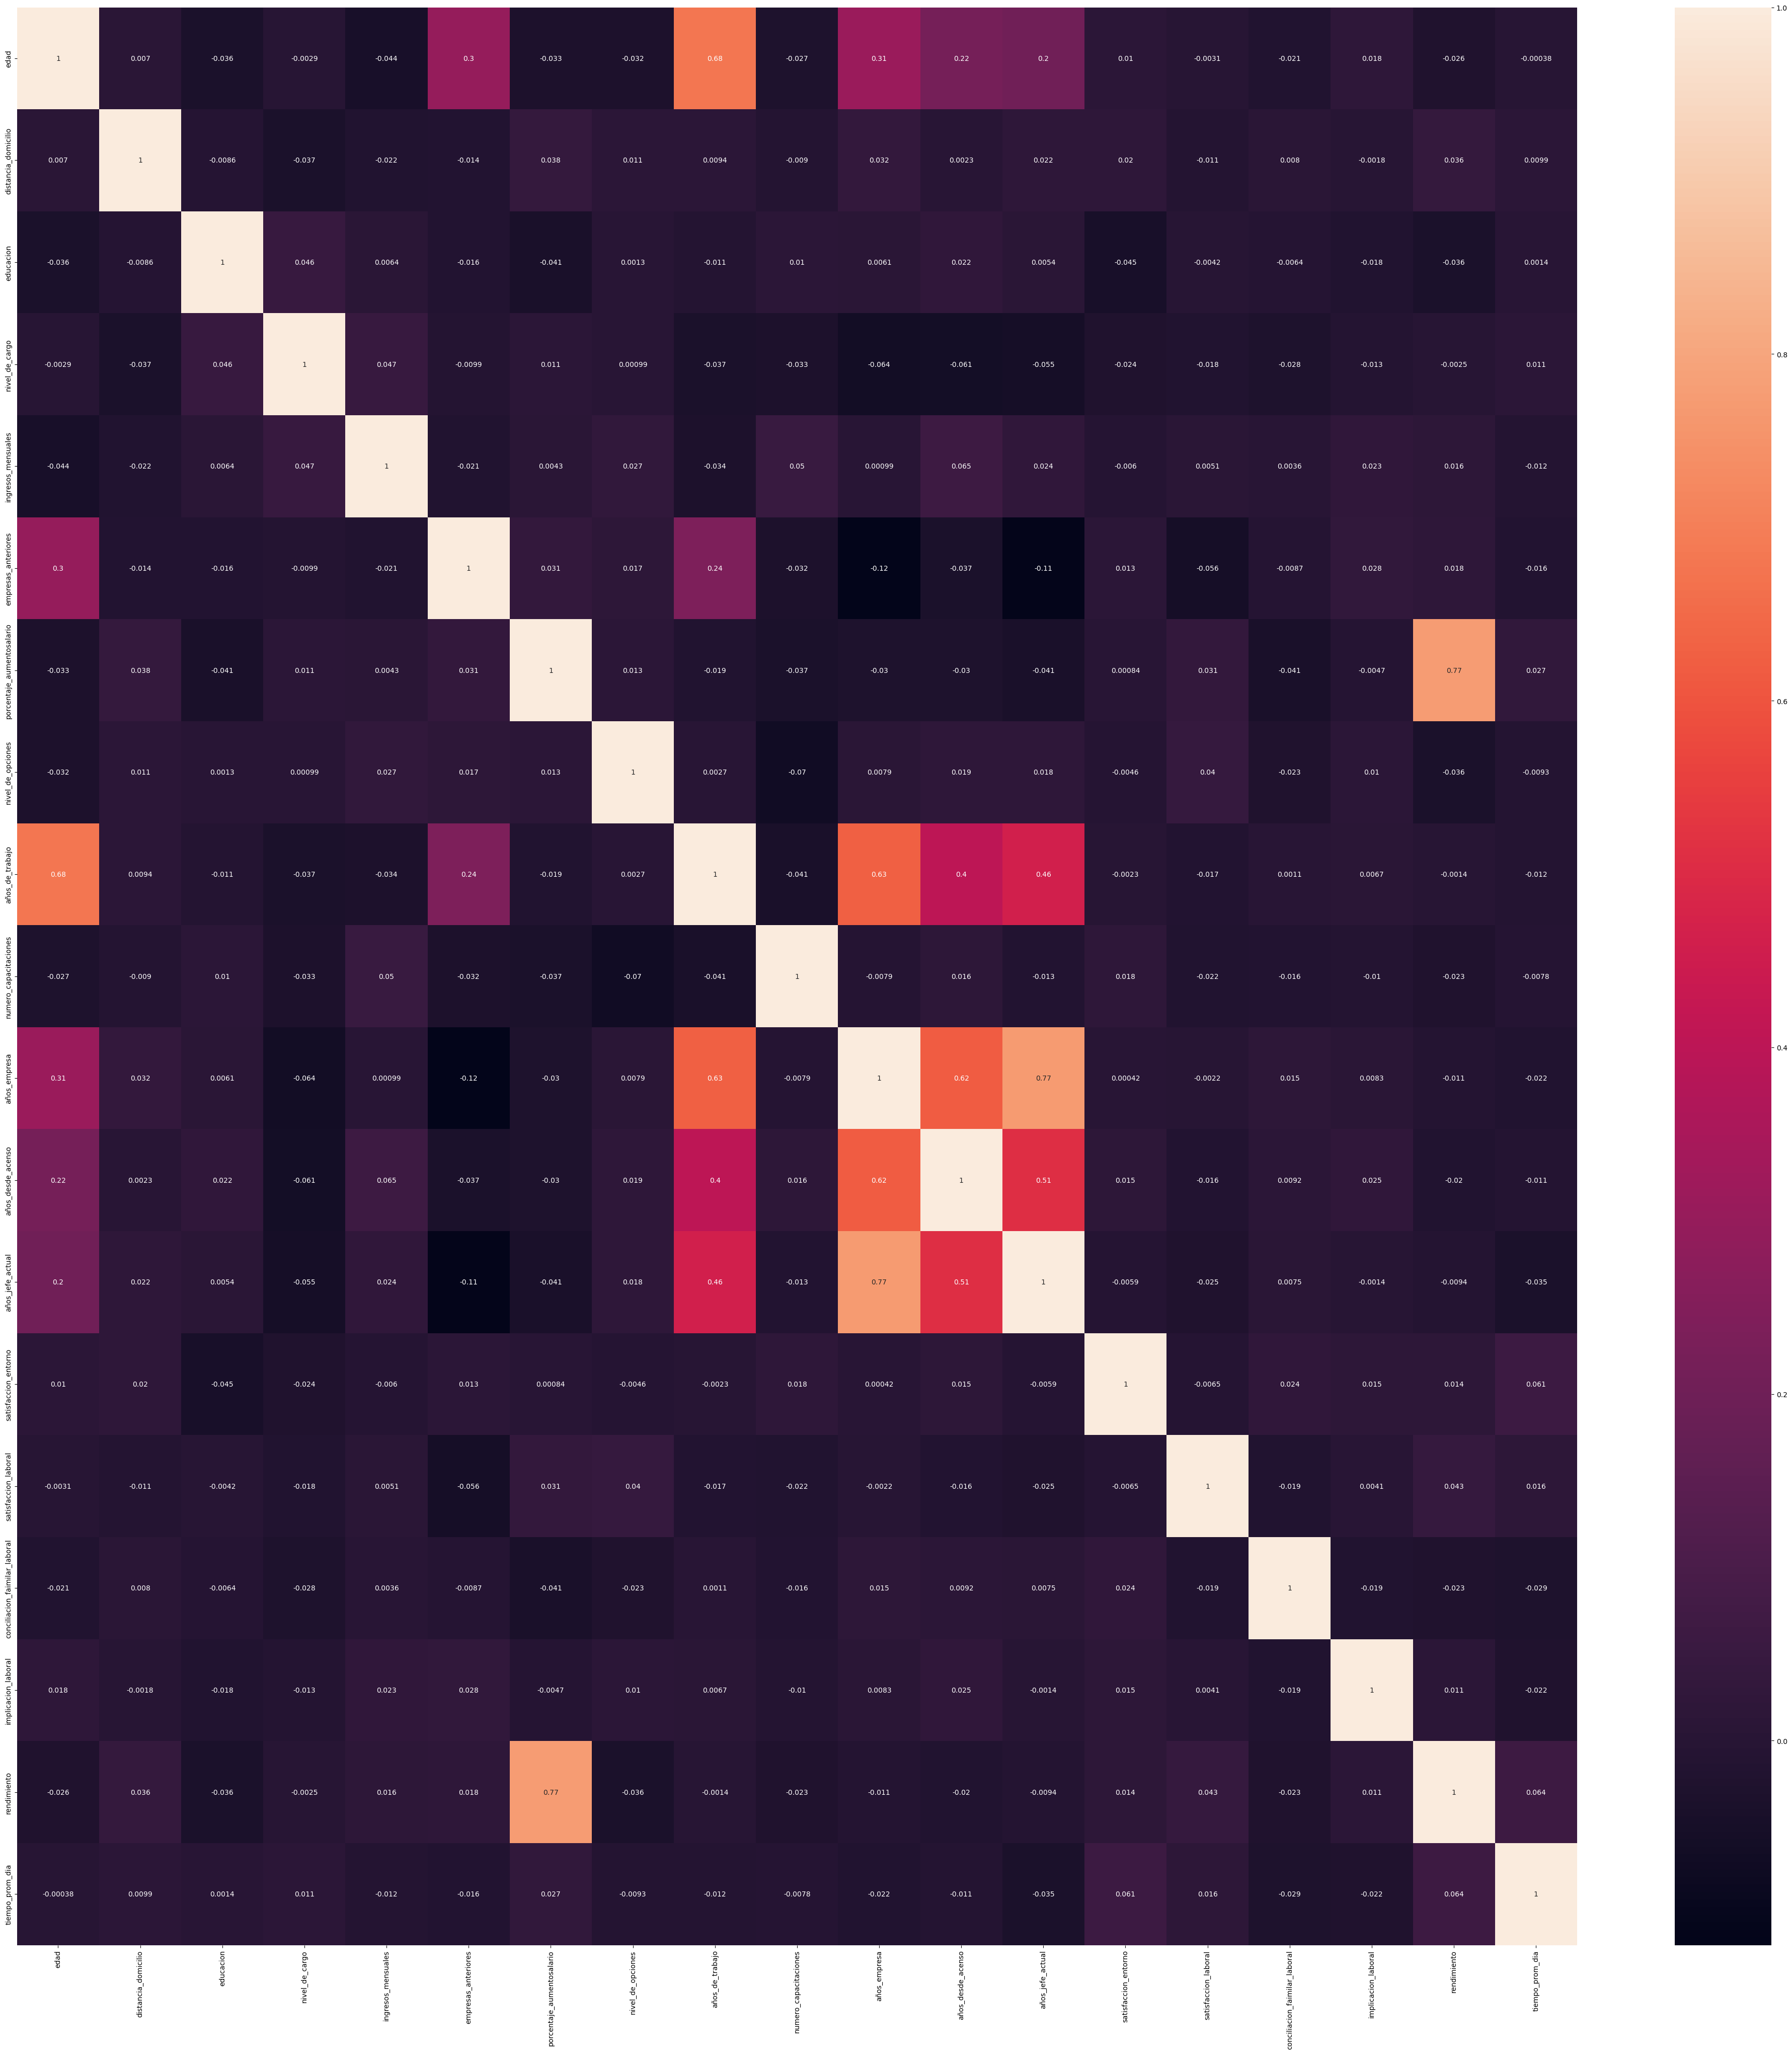

In [34]:

from matplotlib.pyplot import figure
figure(figsize=(50,50))
sns.heatmap(tabla.corr(), annot = True)

In [35]:
corr_matrix = tabla.corr()
corr_matrix 

edad  distancia_domicilio  educacion  \
edad                           1.000000             0.006963  -0.035706   
distancia_domicilio            0.006963             1.000000  -0.008638   
educacion                     -0.035706            -0.008638   1.000000   
nivel_de_cargo                -0.002884            -0.037329   0.045746   
ingresos_mensuales            -0.044314            -0.021607   0.006410   
empresas_anteriores            0.299243            -0.013843  -0.016250   
porcentaje_aumentosalario     -0.033137             0.038125  -0.040531   
nivel_de_opciones             -0.031753             0.011169   0.001261   
años_de_trabajo                0.680661             0.009374  -0.010717   
numero_capacitaciones         -0.027308            -0.009001   0.010472   
años_empresa                   0.311309             0.031684   0.006080   
años_desde_acenso              0.216513             0.002290   0.022490   
años_jefe_actual               0.202089             0.021584   0.005358   
satisfaccion_entorno           0.010089             0.020183  -0.045469   
satisfaccion_laboral          -0.003086            -0.011144  -0.004173   
conciliacion_faimilar_laboral -0.021297             0.008000  -0.006406   
implicacion_laboral            0.018196            -0.001837  -0.018279   
rendimiento                   -0.025563             0.036418  -0.035591   
tiempo_prom_dia               -0.000377             0.009927   0.001406   

                               nivel_de_cargo  ingresos_mensuales  \
edad                                -0.002884           -0.044314   
distancia_domicilio                 -0.037329           -0.021607   
educacion                            0.045746            0.006410   
nivel_de_cargo                       1.000000            0.047316   
ingresos_mensuales                   0.047316            1.000000   
empresas_anteriores                 -0.009875           -0.020726   
porcentaje_aumentosalario            0.010973            0.004325   
nivel_de_opciones                    0.000993            0.026930   
años_de_trabajo                     -0.036957           -0.033787   
numero_capacitaciones               -0.032500            0.050112   
años_empresa                        -0.064219            0.000995   
años_desde_acenso                   -0.060811            0.065219   
años_jefe_actual                    -0.055251            0.024304   
satisfaccion_entorno                -0.024448           -0.006006   
satisfaccion_laboral                -0.018279            0.005063   
conciliacion_faimilar_laboral       -0.027664            0.003572   
implicacion_laboral                 -0.012630            0.023346   
rendimiento                         -0.002474            0.016093   
tiempo_prom_dia                      0.011067           -0.012430   

                               empresas_anteriores  porcentaje_aumentosalario  \
edad                                      0.299243                  -0.033137   
distancia_domicilio                      -0.013843                   0.038125   
educacion                                -0.016250                  -0.040531   
nivel_de_cargo                           -0.009875                   0.010973   
ingresos_mensuales                       -0.020726                   0.004325   
empresas_anteriores                       1.000000                   0.030860   
porcentaje_aumentosalario                 0.030860                   1.000000   
nivel_de_opciones                         0.017163                   0.012548   
años_de_trabajo                           0.238807                  -0.018736   
numero_capacitaciones                    -0.032286                  -0.037392   
años_empresa                             -0.117959                  -0.029707   
años_desde_acenso                        -0.036656                  -0.029542   
años_jefe_actual                         -0.109667                  -0.040864   
satisfaccion_entorn

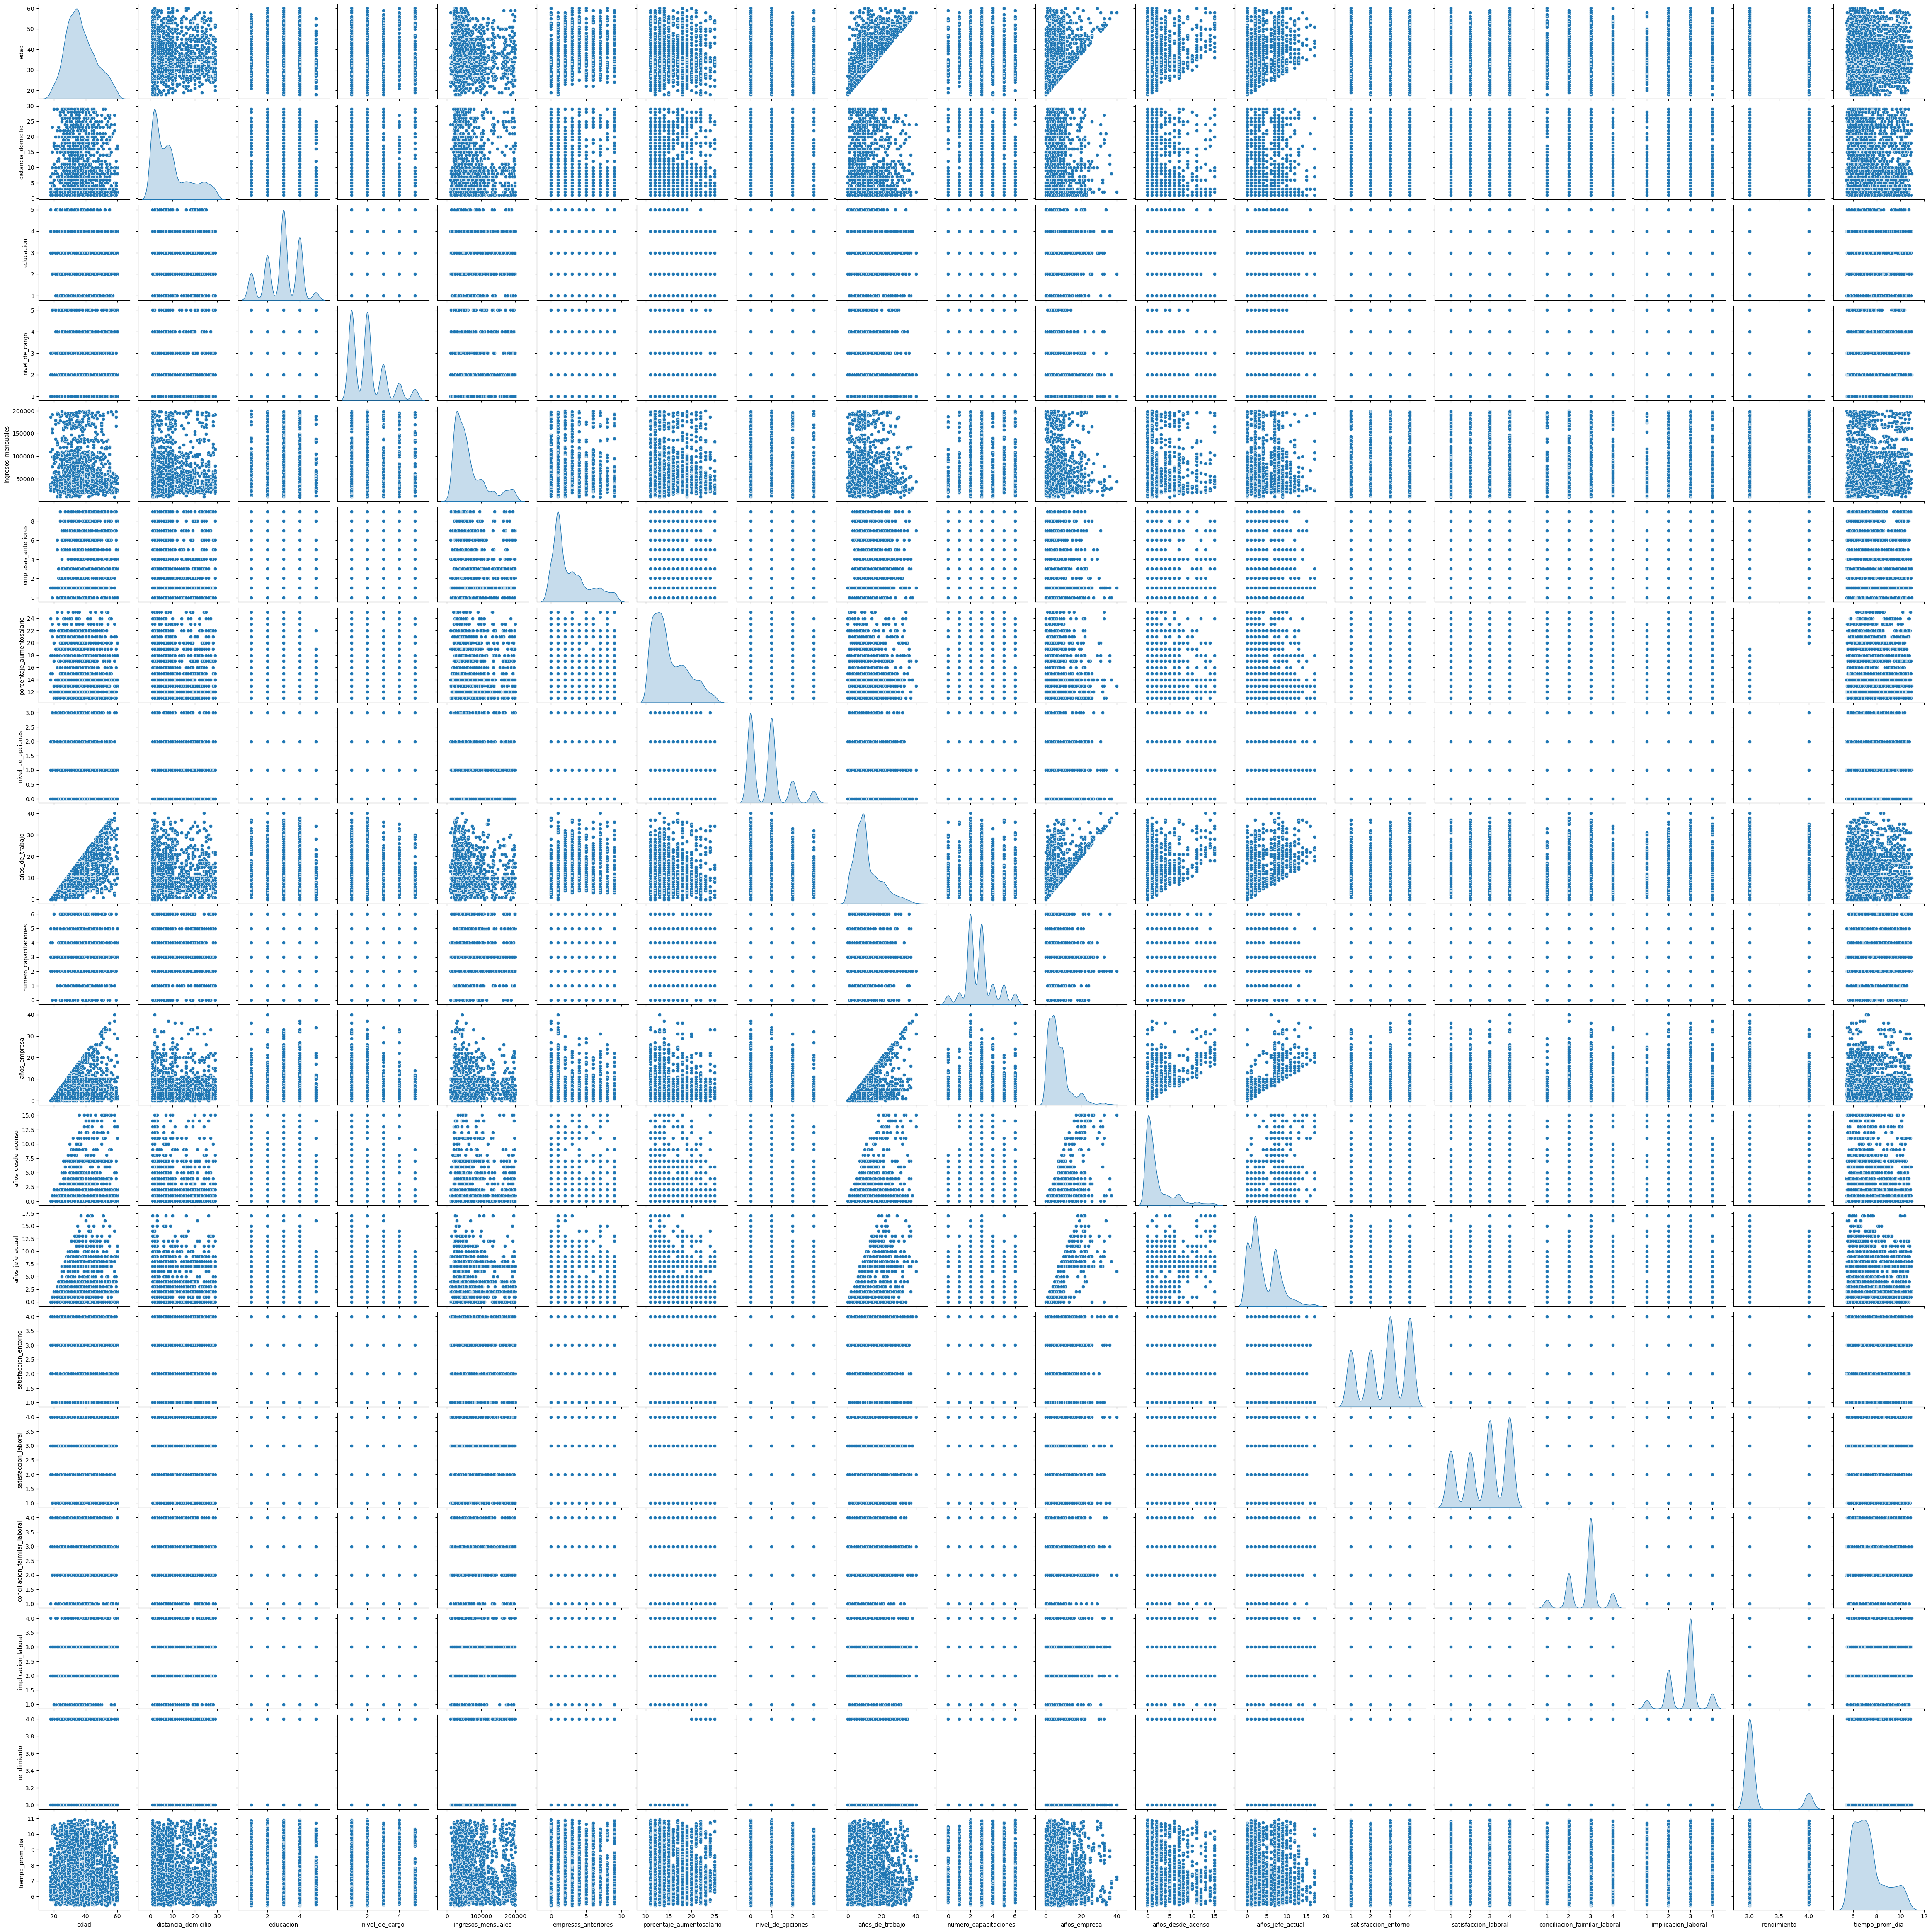

In [37]:
sns.pairplot(tabla.select_dtypes(exclude = object), diag_kind="kde")

# ANALISIS RELACION DE VARIABLES CATEGORICAS

# MODELO BASE CON TODAS LAS VARIABLES

### VARIABLES ORDINALES A STRING

In [197]:
tablabase=tabla.copy()
tablabase.frecuencia_viajes=tablabase.frecuencia_viajes.astype(str)
tablabase.dtypes

edad                               int64
desercion_año_anterior            object
frecuencia_viajes                 object
departamento                      object
distancia_domicilio                int64
educacion                          int64
formacion                         object
genero                            object
nivel_de_cargo                     int64
nombre_cargo                      object
estado_civil                      object
ingresos_mensuales                 int64
empresas_anteriores              float64
porcentaje_aumentosalario          int64
nivel_de_opciones                  int64
años_de_trabajo                  float64
numero_capacitaciones              int64
años_empresa                       int64
años_desde_acenso                  int64
años_jefe_actual                   int64
satisfaccion_entorno             float64
satisfaccion_laboral             float64
conciliacion_faimilar_laboral    float64
implicacion_laboral                int64
rendimiento     

In [206]:
tablabase=tabla.copy()
columnascategoricas=["numero_capacitaciones","empresas_anteriores"]
tablabase[columnascategoricas] = tablabase[columnascategoricas].astype(str)
tablabase.dtypes

edad                               int64
desercion_año_anterior            object
frecuencia_viajes                 object
departamento                      object
distancia_domicilio                int64
educacion                          int64
formacion                         object
genero                            object
nivel_de_cargo                     int64
nombre_cargo                      object
estado_civil                      object
ingresos_mensuales                 int64
empresas_anteriores               object
porcentaje_aumentosalario          int64
nivel_de_opciones                  int64
años_de_trabajo                  float64
numero_capacitaciones             object
años_empresa                       int64
años_desde_acenso                  int64
años_jefe_actual                   int64
satisfaccion_entorno             float64
satisfaccion_laboral             float64
conciliacion_faimilar_laboral    float64
implicacion_laboral                int64
rendimiento     

In [ ]:
tabla["desercion_año_anterior"]=tabla["desercion_año_anterior"].apply(lambda x: 1 if else int(tabla["empresas_anteriores"].median()))

In [207]:
# Opción 2
#dic = {'No':0, 'Yes':1}
tablabase["desercion"]=tablabase['desercion_año_anterior'].replace({'No':0, 'Yes':1})
del tablabase['desercion_año_anterior']
tablabase

edad  frecuencia_viajes            departamento  distancia_domicilio  \
0       51      Travel_Rarely                   Sales                    6   
1       31  Travel_Frequently  Research & Development                   10   
2       32  Travel_Frequently  Research & Development                   17   
3       38         Non-Travel  Research & Development                    2   
4       32      Travel_Rarely  Research & Development                   10   
...    ...                ...                     ...                  ...   
4405    42      Travel_Rarely  Research & Development                    5   
4406    29      Travel_Rarely  Research & Development                    2   
4407    25      Travel_Rarely  Research & Development                   25   
4408    42      Travel_Rarely                   Sales                   18   
4409    40      Travel_Rarely  Research & Development                   28   

      educacion      formacion  genero  nivel_de_cargo  \
0             2  Life Sciences  Female               1   
1             1  Life Sciences  Female               1   
2             4          Other    Male               4   
3             5  Life Sciences    Male               3   
4             1        Medical    Male               1   
...         ...            ...     ...             ...   
4405          4        Medical  Female               1   
4406          4        Medical    Male               1   
4407          2  Life Sciences    Male               2   
4408          2        Medical    Male               1   
4409          3        Medical    Male               2   

                   nombre_cargo estado_civil  ...  años_empresa  \
0     Healthcare Representative      Married  ...             1   
1            Research Scientist       Single  ...             5   
2               Sales Executive      Married  ...             5   
3               Human Resources      Married  ...             8   
4               Sales Executive       Single  ...             6   
...                         ...          ...  ...           ...   
4405         Research Scientist       Single  ...             3   
4406      Laboratory Technician     Divorced  ...             3   
4407            Sales Executive      Married  ...             4   
4408      Laboratory Technician     Divorced  ...             9   
4409      Laboratory Technician     Divorced  ...            21   

     años_desde_acenso  años_jefe_actual  satisfaccion_entorno  \
0                    0                 0                   3.0   
1                    1                 4                   3.0   
2                    0                 3                   2.0   
3                    7                 5                   4.0   
4                    0                 4                   4.0   
...                ...               ...                   ...   
4405                 0                 2                   4.0   
4406                 0                 2                   4.0   
4407                 1                 2                   1.0   
4408                 7                 8                   4.0   
4409                 3                 9                   1.0   

      satisfaccion_laboral conciliacion_faimilar_laboral  implicacion_laboral  \
0                      4.0                           2.0                    3   
1                      2.0                           4.0                    2   
2                      2.0                           1.0                    3   
3                      4.0                           3.0                    2   
4                      1.0                           3.0                    3   
...                    ...                           ...                  ...   
4405                   1.0                           3.0                    3   
4406                   4.0                           3.0                    2   
4407                   3.0                   

In [208]:
tablabase1=pd.get_dummies(tablabase)
tablabase1

edad  distancia_domicilio  educacion  nivel_de_cargo  \
0       51                    6          2               1   
1       31                   10          1               1   
2       32                   17          4               4   
3       38                    2          5               3   
4       32                   10          1               1   
...    ...                  ...        ...             ...   
4405    42                    5          4               1   
4406    29                    2          4               1   
4407    25                   25          2               2   
4408    42                   18          2               1   
4409    40                   28          3               2   

      ingresos_mensuales  porcentaje_aumentosalario  nivel_de_opciones  \
0                 131160                         11                  0   
1                  41890                         23                  1   
2                 193280                         15                  3   
3                  83210                         11                  3   
4                  23420                         12                  2   
...                  ...                        ...                ...   
4405               60290                         17                  1   
4406               26790                         15                  0   
4407               37020                         20                  0   
4408               23980                         14                  1   
4409               54680                         12                  0   

      años_de_trabajo  años_empresa  años_desde_acenso  ...  \
0                 1.0             1                  0  ...   
1                 6.0             5                  1  ...   
2                 5.0             5                  0  ...   
3                13.0             8                  7  ...   
4                 9.0             6                  0  ...   
...               ...           ...                ...  ...   
4405             10.0             3                  0  ...   
4406             10.0             3                  0  ...   
4407              5.0             4                  1  ...   
4408             10.0             9                  7  ...   
4409             11.0            21                  3  ...   

      empresas_anteriores_7.0  empresas_anteriores_8.0  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           0                        0   
...                       ...                      ...   
4405                        0                        0   
4406                        0                        0   
4407                        0                        0   
4408                        0                        0   
4409                        0                        0   

      empresas_anteriores_9.0  numero_capacitaciones_0  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           0                        0   
...                       ...                      ...   
4405                        0                        0   
4406                        0                        0   
4407                        0                        0   
4408                        0                        0   
4409                        0                        0   

      numero_capacitaciones_1  numero_capacitaciones_2  \
0                           0                        0   
1                           0                        0   
2                           0                  

In [209]:
tablabase1["desercion"].unique()

array([0, 1], dtype=int64)

### NORMALIZACION

In [210]:
tablabase1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 61 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   edad                                    4410 non-null   int64  
 1   distancia_domicilio                     4410 non-null   int64  
 2   educacion                               4410 non-null   int64  
 3   nivel_de_cargo                          4410 non-null   int64  
 4   ingresos_mensuales                      4410 non-null   int64  
 5   porcentaje_aumentosalario               4410 non-null   int64  
 6   nivel_de_opciones                       4410 non-null   int64  
 7   años_de_trabajo                         4410 non-null   float64
 8   años_empresa                            4410 non-null   int64  
 9   años_desde_acenso                       4410 non-null   int64  
 10  años_jefe_actual                        4410 non-null   int6

In [211]:
y=tablabase1["desercion"]
x=tablabase1.drop(["desercion"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

columnasenteras=["edad","distancia_domicilio","educacion","nivel_de_cargo","ingresos_mensuales","porcentaje_aumentosalario","nivel_de_opciones","años_empresa","años_desde_acenso","años_jefe_actual","implicacion_laboral","rendimiento"]
tablabase1[columnasenteras]=tablabase1[columnasenteras].astype(float)
columnasfloat=list(tablabase1.select_dtypes("float64").columns)
pipeline=ColumnTransformer([("num", StandardScaler(),columnasfloat)],remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

In [218]:
from sklearn.metrics import accuracy_score

# Entrenamiento del modelo
modelo = LogisticRegression(class_weight="balanced")

# Ajustar el modelo a los datos
modelo.fit(X_train, y_train)

# Desempeño en el entrenamiento
y_train_pred = modelo.predict(X_train)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred) )

Exactitud en el entrenamiento: 0.838


In [219]:
y_pred = modelo.predict(X_test)

# Exactitud en el conjunto de validación
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en el entrenamiento: 0.840


### REGULARIZACION

# SELECCION DE VARIABLES

## UMBRAL DE VARIANZA- SOLO PARA NUMERICAS



## PARA CATEGORICAS ES MAS DESDE LO GRAFICO

## SELECCION UNIVARIANTE

## PARA VARIABLE DEPENDIENTE CATEGORICO